In [1]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

# Root directory of the project
ROOT_DIR = os.getcwd()
if ROOT_DIR.endswith("sandbox"):
    # Go up two levels to the repo root
    ROOT_DIR = os.path.dirname(ROOT_DIR)

mrcnn = ROOT_DIR + '/mrcnn'

# Import Mask RCNN
sys.path.append(mrcnn)
import utils
import visualize
from visualize import display_images
import model as modellib
from model import log

import wagon

%matplotlib inline

Using TensorFlow backend.


In [2]:
config = wagon.WagonConfig()
WAGON_DIR = os.path.join(ROOT_DIR, "sandbox/select")
print(WAGON_DIR)

/home/vedansh/Wagon Detection/Mask_RCNN/sandbox/select


# Dataset

In [3]:
dataset = wagon.WagonDataset()
dataset.load_wagon(WAGON_DIR, "train")

# Must call before using the dataset
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 55
Class Count: 3
  0. BG                                                
  1. wagon                                             
  2. wagon                                             


# Display Samples

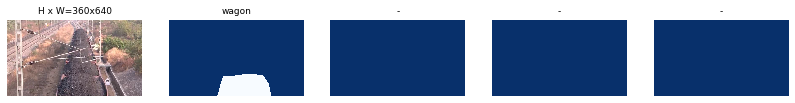

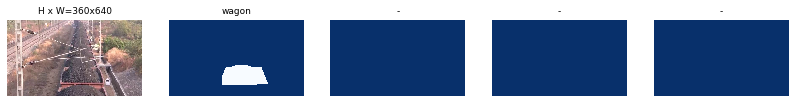

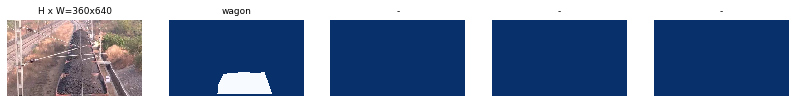

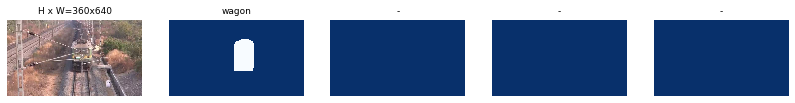

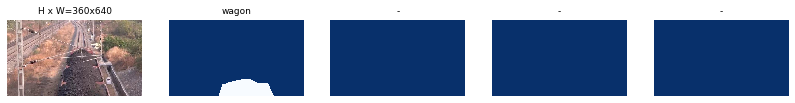

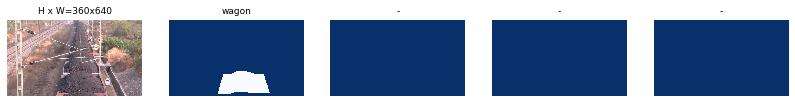

In [4]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 6)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

# Bounding Boxes

image_id  25 /home/vedansh/Wagon Detection/Mask_RCNN/sandbox/select/train/frame34.jpg
image                    shape: (360, 640, 3)         min:    1.00000  max:  255.00000  uint8
mask                     shape: (360, 640, 1)         min:    0.00000  max:    1.00000  uint8
class_ids                shape: (1,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (1, 4)                min:  211.00000  max:  469.00000  int32


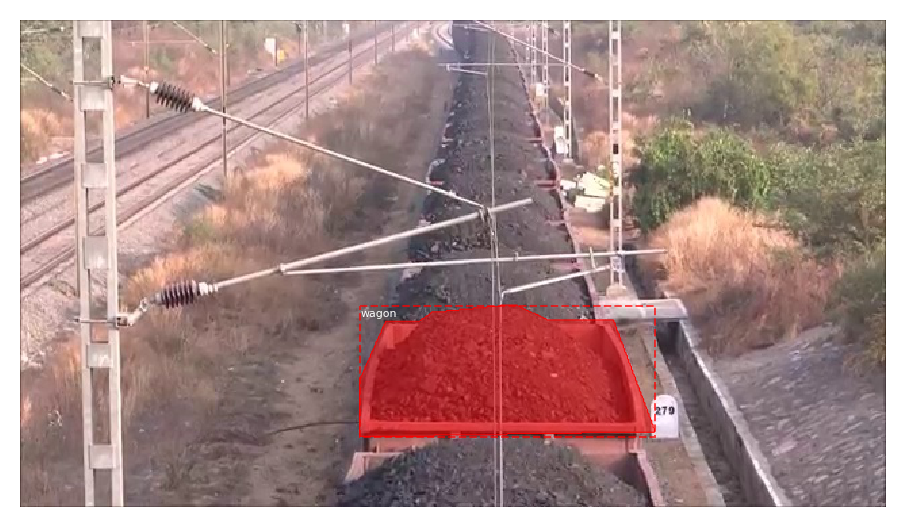

In [5]:
# Load random image and mask.
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

# Resize Images

To support multiple images per batch, images are resized to one size (1024x1024). Aspect ratio is preserved, though. If an image is not square, then zero padding is added at the top/bottom or right/left.

In [6]:
# Load random image and mask.
image_id = np.random.choice(dataset.image_ids, 1)[0]
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
original_shape = image.shape
# Resize
image, window, scale, padding = utils.resize_image(
    image, 
    min_dim=config.IMAGE_MIN_DIM, 
    max_dim=config.IMAGE_MAX_DIM,
    padding=config.IMAGE_PADDING)
mask = utils.resize_mask(mask, scale, padding)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id: ", image_id, dataset.image_reference(image_id))
print("Original shape: ", original_shape)
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

AttributeError: 'WagonConfig' object has no attribute 'IMAGE_PADDING'